<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Engineering/blob/main/Feature-Engineering-(Handling%20Rare-Occurring-Labels).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
 cols=['Neighborhood','Exterior1st','Exterior2nd','SalePrice']
 data=pd.read_csv("/content/train.csv",usecols=cols)

In [ ]:
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [ ]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
data['Neighborhood'].nunique()

25

In [ ]:
feature_cols=['Neighborhood','Exterior1st','Exterior2nd']
for col in feature_cols:
  print('{}:{}'.format(col,data[col].nunique()))


Neighborhood:25
Exterior1st:15
Exterior2nd:16


In [ ]:
data.shape

(1460, 4)

In [ ]:
data.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [ ]:
total_houses=data.shape[0]
total_houses

1460

In [ ]:
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [ ]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
temp=data['Neighborhood'].value_counts()/total_houses
temp

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

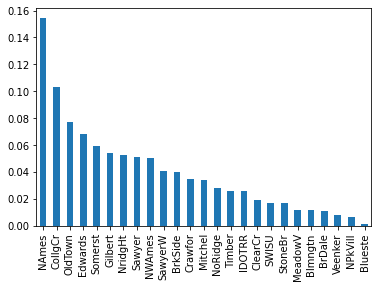

In [ ]:
temp.plot.bar()

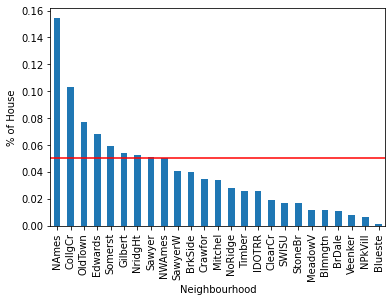

In [ ]:
 temp.plot.bar()
 plt.axhline(y=0.05,color='r')
 plt.xlabel('Neighbourhood')
 plt.ylabel('% of House')
 plt.show()

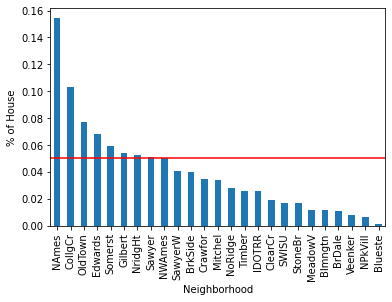

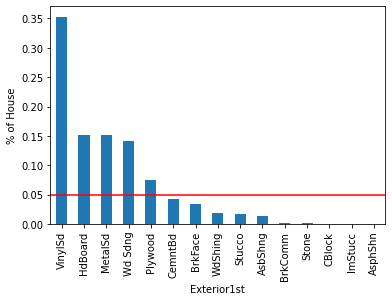

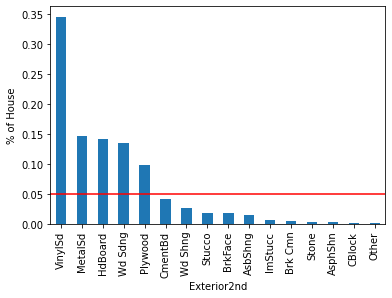

In [ ]:
for col in feature_cols:
  temp=data[col].value_counts()/total_houses
  temp.plot.bar()
  plt.axhline(y=0.05,color='r')
  plt.xlabel(col)
  plt.ylabel('% of House')
  plt.show()

# **How is SalePrice related to these Categories**

In [ ]:
temp

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [ ]:
temp.reset_index()

,index,Exterior2nd
0,VinylSd,0.345205
1,MetalSd,0.146575
2,HdBoard,0.141781
3,Wd Sdng,0.134932
4,Plywood,0.097260
5,CmentBd,0.041096
6,Wd Shng,0.026027
7,Stucco,0.017808
8,BrkFace,0.017123
9,AsbShng,0.013699


In [ ]:
temp=temp=temp.reset_index()
temp.columns=['Exterior2nd','% of houses']
temp

,Exterior2nd,% of houses
0,VinylSd,0.345205
1,MetalSd,0.146575
2,HdBoard,0.141781
3,Wd Sdng,0.134932
4,Plywood,0.097260
5,CmentBd,0.041096
6,Wd Shng,0.026027
7,Stucco,0.017808
8,BrkFace,0.017123
9,AsbShng,0.013699


In [ ]:
data['Exterior2nd']=='VinylSd'

0        True
1       False
2        True
3       False
4        True
        ...  
1455     True
1456    False
1457    False
1458    False
1459    False
Name: Exterior2nd, Length: 1460, dtype: bool

In [ ]:
data[data['Exterior2nd']=='VinylSd']

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
2,CollgCr,VinylSd,VinylSd,223500
4,NoRidge,VinylSd,VinylSd,250000
5,Mitchel,VinylSd,VinylSd,143000
6,Somerst,VinylSd,VinylSd,307000
...,...,...,...,...
1450,NAmes,VinylSd,VinylSd,136000
1452,Edwards,VinylSd,VinylSd,145000
1453,Mitchel,VinylSd,VinylSd,84500
1454,Somerst,VinylSd,VinylSd,185000


In [ ]:
data[data['Exterior2nd']=='VinylSd'].mean()

SalePrice    214432.460317
dtype: float64

In [ ]:
mean_price=data.groupby(['Exterior2nd'])['SalePrice'].mean().reset_index()
mean_price

,Exterior2nd,SalePrice
0,AsbShng,114060.550000
1,AsphShn,138000.000000
2,Brk Cmn,126714.285714
3,BrkFace,195818.000000
4,CBlock,105000.000000
5,CmentBd,230093.833333
6,HdBoard,167661.565217
7,ImStucc,252070.000000
8,MetalSd,149803.172897
9,Other,319000.000000


In [ ]:
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [ ]:
t=temp.merge(mean_price,on='Exterior2nd',how='left')
t

,Exterior2nd,% of houses,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


In [ ]:
# to get mean of salesprice per categories
def get(df,cat):
  temp=data[col].value_counts()/total_houses
  temp=temp.reset_index()
  temp.columns=[cat,'% of houses']
  mean_price=df.groupby([cat])['SalePrice'].mean().reset_index()
  temp=temp.merge(mean_price,on=cat,how='left')
  return temp

In [ ]:
ext_df=get(data,'Exterior2nd')

In [ ]:
ext_df

,Exterior2nd,% of houses,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


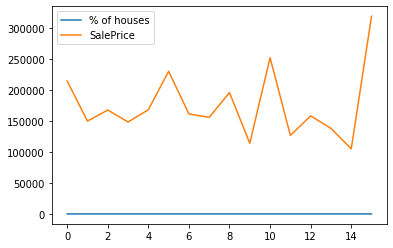

In [ ]:
ext_df.plot()

In [ ]:
def plot_cats(df,cat):
  fig,ax1=plt.subplots()
  plt.xticks(df.index,df[cat],rotation=90)
  ax2=ax1.twinx()
  ax1.bar(df.index,df['% of houses'],color='grey')
  ax2.plot(df.index,df['SalePrice'],color='green',label='House Price')
  ax1.axhline(y=0.05,color='red')
  ax1.set_ylabel('% of houses per category')
  ax1.set_xlabel(cat)
  ax2.set_ylabel('Mean House Price per Category')
  plt.show()

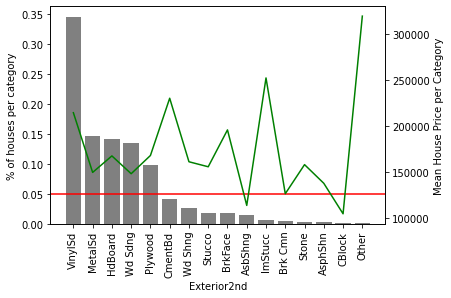

In [ ]:
plot_cats(t,'Exterior2nd')

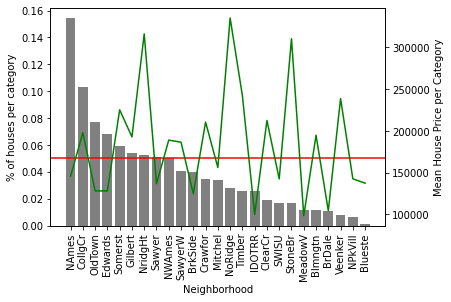

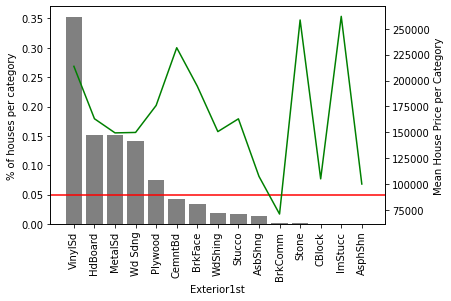

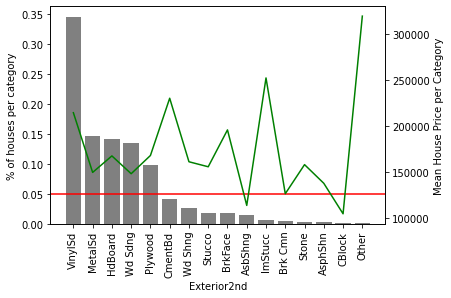

In [ ]:
for col in feature_cols:
  temp=get(data,col)
  plot_cats(temp,col)

# **Grouping of Rare Labels**

In [ ]:
t

,Exterior2nd,% of houses,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


In [ ]:
grouping_dict={'CmentBd':'rare','Wd Shng':'rare'}

In [ ]:
t['Exterior2nd'].map(grouping_dict)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     rare
6     rare
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
Name: Exterior2nd, dtype: object

In [ ]:
(data['Exterior2nd'].value_counts()/total_houses).index

Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd',
       'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn',
       'Stone', 'AsphShn', 'CBlock', 'Other'],
      dtype='object')

In [ ]:
def rare(df,cat):
  temp=df[cat].value_counts()/total_houses
  grouping_dict={
   k: 'rare' if k not in temp[temp>=0.05].index else k for k in temp.index   
  }
  t=df[cat].map(grouping_dict)
  return t

In [ ]:
rare(data,'Exterior2nd')

0       VinylSd
1       MetalSd
2       VinylSd
3          rare
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457       rare
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [ ]:
rare(data,'Exterior2nd').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
rare       196
Plywood    142
Name: Exterior2nd, dtype: int64

In [ ]:
data['Exterior2nd']=rare(data,'Exterior2nd')
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,rare,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,rare,266500
1458,NAmes,MetalSd,MetalSd,142125


In [ ]:
data['Exterior1st']=rare(data,'Exterior1st')

In [ ]:
data['Neighborhood']=rare(data,'Neighborhood')

In [ ]:
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,rare,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,rare,Wd Sdng,rare,140000
4,rare,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,rare,rare,rare,266500
1458,NAmes,MetalSd,MetalSd,142125


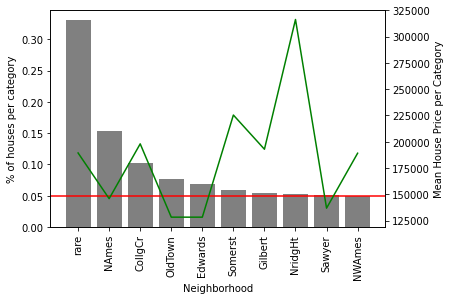

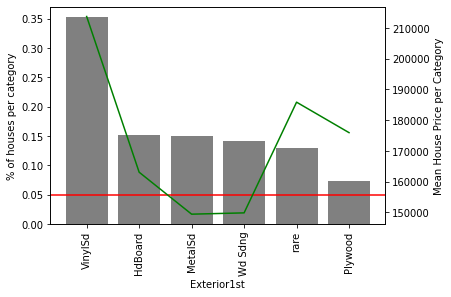

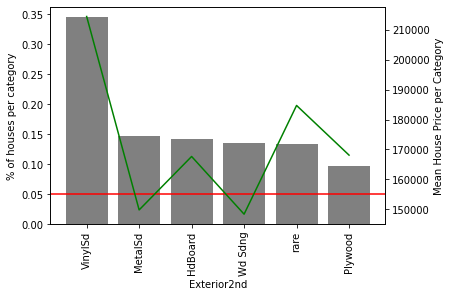

In [ ]:
for col in feature_cols:
  temp=get(data,col)
  plot_cats(temp,col)